# Diabetes classification using decision tree

In [1]:
# Build decision tree to classfiy diabetes with sklearn
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load dataset
dataset = pd.read_csv('../dataset/diabetes_norm.csv')

In [3]:
# Split dataset into training and test set
X = dataset.iloc[:, 0:len(dataset.columns)-1].values
y = dataset.iloc[:, len(dataset.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
# Create decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

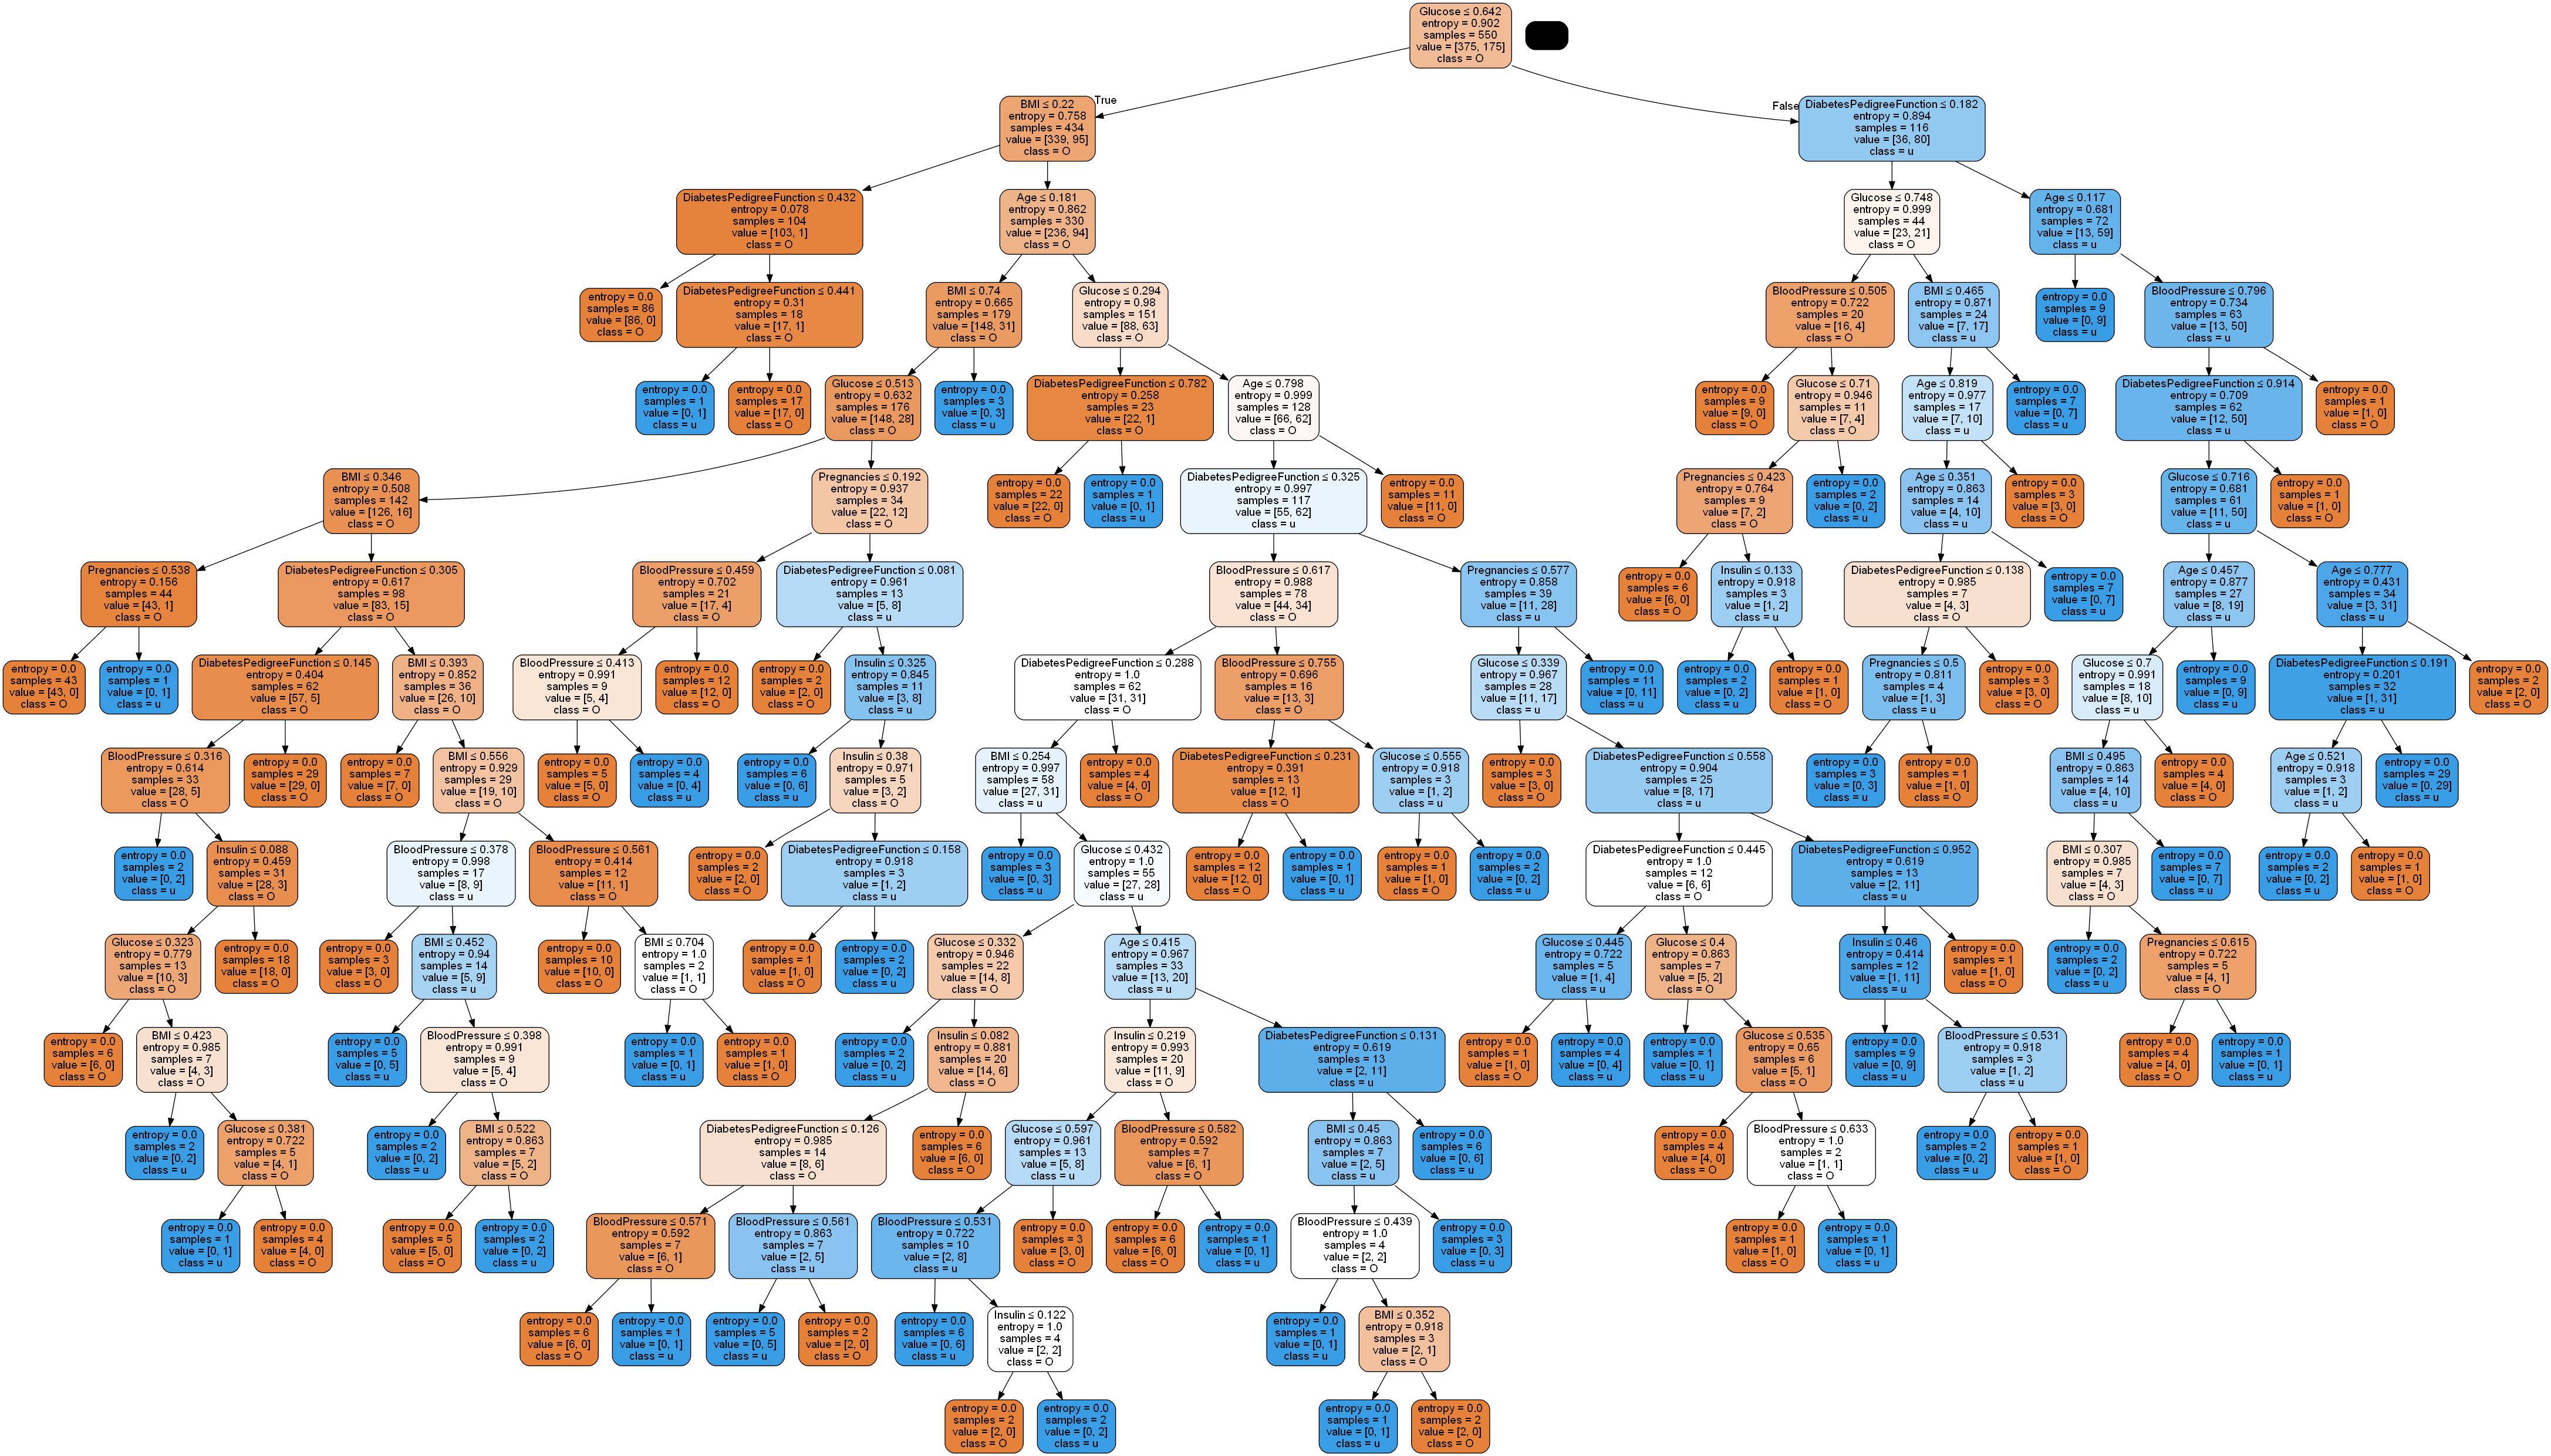

In [5]:
# Visualize decision tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Build decision tree
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=dataset.columns[0:len(dataset.columns)-1],
                class_names=dataset.columns[len(dataset.columns)-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../images/decision_tree.png')
Image(graph.create_png())

In [6]:
# Predict test set result
y_pred = classifier.predict(X_test)

Accuracy:  0.7101449275362319
Confusion Matrix: 
 [[68 18]
 [22 30]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        86
           1       0.62      0.58      0.60        52

    accuracy                           0.71       138
   macro avg       0.69      0.68      0.69       138
weighted avg       0.71      0.71      0.71       138

[[68 18]
 [22 30]]


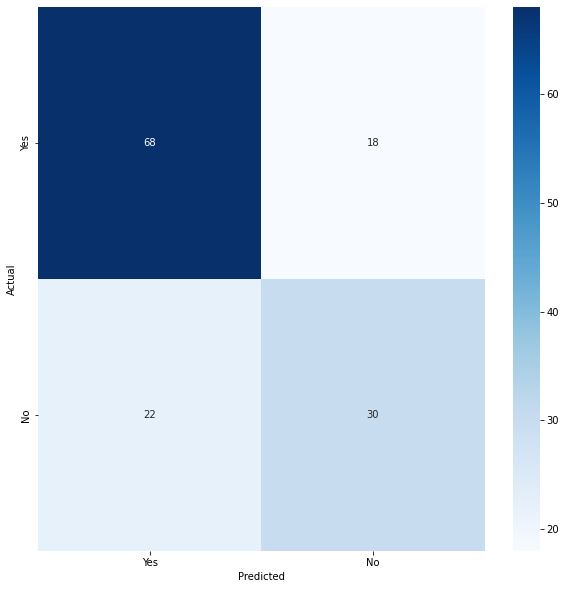

In [7]:
# Evaluate model performance
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(cm,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
# 10-fold validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=10)
print('Accuracy: ', accuracies.mean())
print('Standard Deviation: ', accuracies.std())

Accuracy:  0.6730769230769231
Standard Deviation:  0.07767489740730811
